<a href="https://colab.research.google.com/github/elainehw/123/blob/master/landmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = 'REPLACE_WITH_YOUR_FILE_ID'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [0]:
!pip install dlib


In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
!ls "/content/drive/My Drive/Fall APM Project"

 Facial_Landmark_Data   Outline.gdoc		 Results
'Feature Extraction'    Pre-Processing		 Training
 Fold3_part2	       'Project Ideas.gdoc'	'Untitled presentation.gslides'
 Fold3_part2_img       'Project Proposal.gdoc'


In [0]:
import imageio
import matplotlib.pyplot as plt
from mlxtend.image import extract_face_landmarks

In [0]:
data = []
labels = []
for i in [0,10]:
  if i == 0 :
    status = 0
  else:
    status = 1

  for j in range(20):
    try:
      img = imageio.imread('drive/My Drive/Fall APM Project/Fold3_part2_img/31/' + str(i)+'/image'+str(j+1300) +'.jpg')
      #break
    except: 
      pass
    landmarks = extract_face_landmarks(img)
    data.append(landmarks[36:68])
    labels.append([[status]]*32)
  

In [0]:
import cv2
def getFrame(sec, i, j):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    #if hasFrames:
        #cv2.imwrite("Fold3_part2_img/"+ str(j) +'/' + str(i) + "/image"+str(count)+".jpg", image)     # save frame as JPG file
        #cv2.imwrite("hh/image"+str(count)+".jpg", image) 
        #cv2.imshow('image',image)
    return hasFrames, image

data = []
labels = []
for j in [32]:
    for i in [5]:
        vidcap = cv2.VideoCapture('drive/My Drive/Fall APM Project/Fold3_part2/' + str(j) +'/' + str(i) + '.mp4')
        sec = 0
        frameRate = 600
        count=1
        success, image  = getFrame(sec, i, j)
        while success:
          landmarks = extract_face_landmarks(image)
          data.append(landmarks[36:68])
          labels.append([[i]]*32)
          count = count + 1
          sec = sec + frameRate
          sec = round(sec, 2)
          success, image = getFrame(sec , i, j)
print(data)

[array([[510, 787],
       [531, 778],
       [556, 777],
       [577, 791],
       [555, 797],
       [530, 797],
       [668, 799],
       [694, 790],
       [719, 792],
       [738, 805],
       [718, 812],
       [692, 809],
       [534, 954],
       [562, 937],
       [589, 926],
       [609, 932],
       [629, 927],
       [655, 943],
       [682, 964],
       [653, 976],
       [628, 978],
       [606, 978],
       [585, 976],
       [560, 969],
       [546, 954],
       [588, 949],
       [607, 952],
       [628, 951],
       [670, 963],
       [629, 953],
       [608, 953],
       [588, 950]], dtype=int32), array([[ 499,  878],
       [ 518,  876],
       [ 538,  873],
       [ 558,  875],
       [ 539,  883],
       [ 518,  885],
       [ 648,  878],
       [ 670,  878],
       [ 690,  879],
       [ 709,  881],
       [ 690,  889],
       [ 669,  886],
       [ 530, 1028],
       [ 554, 1016],
       [ 576, 1007],
       [ 597, 1014],
       [ 617, 1008],
       [ 639, 1017]

In [0]:
import numpy as np
labels = np.array(labels)
data = np.array(data)

In [0]:
labels.shape

(13, 32, 1)

In [0]:
data.shape

(13, 32, 2)

In [0]:
np.save(open('Labels.npy', 'wb'),labels)
np.save(open('Data.npy', 'wb'),data)

In [0]:
def download_file(file_id, file_name):
    '''
    file_id: Make sure that you can access this file from your account or else, this will not run
    file_name: Name of the file by which you want to save
    '''
    downloaded = drive.CreateFile({'id': file_id})
    downloaded.GetContentFile(file_name)
    print('Downloaded file with ID {} and name {}'.format(file_id, file_name))

In [0]:
from google.colab import files
files.download('Data.npy')

In [0]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv3D
from keras.layers.pooling import MaxPooling3D
from keras.models import Sequential
visible = Input(shape=(10,12,12,1))
conv1 = Conv3D(8, kernel_size=2, activation='relu')(visible)
pool1 = MaxPooling3D(pool_size=(2, 2, 2))(conv1)
flat1 = Flatten()(pool1)
hidden1 = Dense(10, activation='relu')(flat1)
output = Dense(2, activation='softmax')(hidden1)
model = Model(inputs=visible, outputs=output)

In [0]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(32,2,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Generate dummy data
import numpy as np
#data = np.random.random((1000, 100))
#labels = np.random.randint(2, size=(1000, 1))

# Train the model, iterating on the data in batches of 32 samples
from keras.utils import to_categorical
#print(labels.shape)

#y_binary = to_categorical(labels)
#print(y_binary.shape)
model.fit(data, labels, epochs=30, batch_size=1)
model.predict_classes(data)


Epoch 1/30
40/40 [==============================] - 2s 60ms/step - loss: 8.0590 - acc: 0.5000  
Epoch 2/30
40/40 [==============================] - 0s 1ms/step - loss: 8.0590 - acc: 0.5000
Epoch 3/30
40/40 [==============================] - 0s 2ms/step - loss: 8.0590 - acc: 0.5000
Epoch 4/30
40/40 [==============================] - 0s 2ms/step - loss: 8.0590 - acc: 0.5000
Epoch 5/30
40/40 [==============================] - 0s 1ms/step - loss: 8.0590 - acc: 0.5000
Epoch 6/30
40/40 [==============================] - 0s 2ms/step - loss: 8.0590 - acc: 0.5000
Epoch 7/30
40/40 [==============================] - 0s 1ms/step - loss: 8.0590 - acc: 0.5000
Epoch 8/30
40/40 [==============================] - 0s 1ms/step - loss: 8.0590 - acc: 0.5000 
Epoch 9/30
40/40 [==============================] - 0s 1ms/step - loss: 8.0590 - acc: 0.5000
Epoch 10/30
40/40 [==============================] - 0s 2ms/step - loss: 8.0590 - acc: 0.5000
Epoch 11/30
40/40 [==============================] - 0s 1ms/step 

array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]], dtype=int32)

In [0]:
labels = [[[1]]*32]*10
labels = np.array(labels)
labels.shape


(10, 32, 1)

In [0]:
data = [landmarks[36:68]]*10
data = np.array(data)
data.shape

(10, 32, 2)

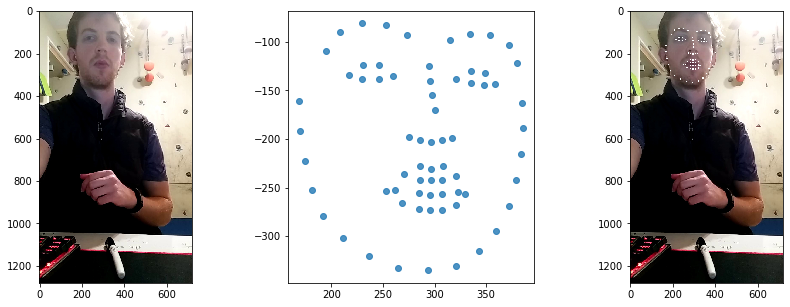

In [0]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 3, 1)
ax.imshow(img)
ax = fig.add_subplot(1, 3, 2)
ax.scatter(landmarks[:, 0], -landmarks[:, 1], alpha=0.8)
ax = fig.add_subplot(1, 3, 3)
img2 = img.copy()
for p in landmarks:
    img2[p[1]-3:p[1]+3,p[0]-3:p[0]+3,:] = (255, 255, 255)
ax.imshow(img2)
plt.show()

In [0]:
landmarks[1]
A = dist.euclidean(eye[1], eye[5])
B = dist.euclidean(eye[2], eye[4])

	# compute the euclidean distance between the horizontal
	# eye landmark (x, y)-coordinates
C = dist.euclidean(eye[0], eye[3])

	# compute the eye aspect ratio
ear = (A + B) / (2.0 * C)

array([170, 192], dtype=int32)

In [0]:
from keras.layers import Dense, Flatten, Dropout, ZeroPadding3D
from keras.layers.recurrent import LSTM
from keras.models import Sequential, load_model
from keras.optimizers import Adam, RMSprop
from keras.layers.wrappers import TimeDistributed
from keras.layers.convolutional import (Conv2D, MaxPooling3D, Conv3D,
    MaxPooling2D)
from collections import deque
import sys

ModuleNotFoundError: No module named 'keras'

In [0]:
class ResearchModels():
    def __init__(self, nb_classes, model, seq_length,
                 saved_model=None, features_length=2048):

        # Set defaults.
        self.seq_length = seq_length
        self.load_model = load_model
        self.saved_model = saved_model
        self.nb_classes = nb_classes
        self.feature_queue = deque()

        # Set the metrics. Only use top k if there's a need.
        metrics = ['accuracy']
        #if self.nb_classes >= 10:
        #   metrics.append('top_k_categorical_accuracy')

        # Get the appropriate model.
        print("Loading LSTM model.")
        self.input_shape = (seq_length, features_length)
        self.model = self.lstm()
        # Now compile the network.
        optimizer = Adam(lr=0.00005)
        self.model.compile(loss='categorical_crossentropy', optimizer=optimizer,
                           metrics=metrics)

        print(self.model.summary())

    def lstm(self):
        """Build a simple LSTM network. We pass the extracted features from
        our CNN to this model predomenently."""
        # Model.
    print self.input_shape
        model = Sequential()
        # 2048 means num of units in hidden layers
        # return_sequences=True return-(samples,timesteps,features)--3D-- output for each timestep
        # return_sequences=False return-（samples, features）--2D-- only output in the final timestep
        # input_shape=(timestep,num of features) --don't need Batch_size(# of videoes)
        model.add(LSTM(2048, return_sequences=True,
                       input_shape=self.input_shape,
                       dropout=0.5))
        model.add(Flatten())
        model.add(Dense(1024, activation='relu')) # add a densely-connected layer with 1024 units to the model
        model.add(Dense(512, activation='relu'))# add a densely-connected layer with 512 units to the model
        model.add(Dropout(0.5))
        model.add(Dense(self.nb_classes, activation='softmax'))# add a softmax layer with 2 output units

        return model
